In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, sys
from tqdm import tqdm
from datetime import datetime

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

from sklearn.decomposition import PCA


from autoencoder import Autoencoder
from solver import train_vali_all_epochs, dev_train_vali_all_epochs, test

In [2]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=6)

In [3]:
run_id = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")
save_path = os.getenv("HOME") + '/sparsify_models/AE/MNIST/' +run_id +'/'
print(save_path)

/home/david/sparsify_models/AE/MNIST/2024-12-06_00-29-10/


In [4]:
model = Autoencoder(n_input=784, n_hidden_ls=[512, 128, 32], n_layers=3)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.99)
device = torch.device('cuda')

In [5]:
epochs = 50
explained_variance_ratios = []
latent_matrices = []

for i in range(epochs):
    model.train()
    train_vali_all_epochs(model, train_loader, test_loader, optimizer, n_epochs=1, device=device, save_path=save_path+'Static/')

    latent_list = []
    model.eval()

    # Loop through validation data
    with torch.no_grad():  # Gradients not calculated
        for batch_idx, (data, target) in enumerate(test_loader):
            # Convert to a PyTorch variable
            data = Variable(data).to('cuda')

            # Flatten the input data into a 2D tensor [batch_size, num_features]
            batch_size = data.size(0)
            input = data.view(batch_size, -1).to('cuda')

            encoded = model(input)[0]

            latent_list.append(encoded.cpu().numpy())

    latent_matrix = np.concatenate(latent_list)

    pca = PCA(n_components=32)
    pca.fit(latent_matrix)

    explained_variance_ratios.append(pca.explained_variance_ratio_)
    latent_matrices.append(pca.components_)

Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000224: 100%|██████████| 469/469 [00:01<00:00, 242.67it/s]


====> Epoch: 0 Average loss: 0.0358


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0201
Directory created: /home/david/sparsify_models/AE/MNIST/2024-12-06_00-29-10/Static/
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000187: 100%|██████████| 469/469 [00:01<00:00, 245.63it/s]

====> Epoch: 0 Average loss: 0.0184



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0171
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000181: 100%|██████████| 469/469 [00:01<00:00, 260.28it/s]

====> Epoch: 0 Average loss: 0.0174



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000164: 100%|██████████| 469/469 [00:02<00:00, 234.28it/s]

====> Epoch: 0 Average loss: 0.0174



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 260.34it/s]

====> Epoch: 0 Average loss: 0.0174



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000189: 100%|██████████| 469/469 [00:01<00:00, 240.16it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000185: 100%|██████████| 469/469 [00:01<00:00, 251.69it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000188: 100%|██████████| 469/469 [00:01<00:00, 257.35it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:01<00:00, 250.00it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000187: 100%|██████████| 469/469 [00:01<00:00, 253.06it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0169
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000173: 100%|██████████| 469/469 [00:01<00:00, 260.44it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000181: 100%|██████████| 469/469 [00:01<00:00, 257.29it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 251.19it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:01<00:00, 245.40it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000172: 100%|██████████| 469/469 [00:01<00:00, 254.90it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000171: 100%|██████████| 469/469 [00:01<00:00, 252.37it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000186: 100%|██████████| 469/469 [00:01<00:00, 254.84it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 253.29it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000195: 100%|██████████| 469/469 [00:01<00:00, 238.54it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 256.06it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 252.88it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000180: 100%|██████████| 469/469 [00:01<00:00, 256.68it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000187: 100%|██████████| 469/469 [00:01<00:00, 251.57it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000170: 100%|██████████| 469/469 [00:01<00:00, 245.92it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000184: 100%|██████████| 469/469 [00:01<00:00, 251.97it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000168: 100%|██████████| 469/469 [00:01<00:00, 259.88it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000175: 100%|██████████| 469/469 [00:01<00:00, 251.05it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000189: 100%|██████████| 469/469 [00:02<00:00, 231.75it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 247.72it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000179: 100%|██████████| 469/469 [00:01<00:00, 236.70it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000189: 100%|██████████| 469/469 [00:01<00:00, 257.41it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000176: 100%|██████████| 469/469 [00:01<00:00, 245.92it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 248.96it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000170: 100%|██████████| 469/469 [00:01<00:00, 251.61it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 242.03it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000172: 100%|██████████| 469/469 [00:01<00:00, 249.64it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 251.96it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 247.35it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 247.07it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 247.34it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000181: 100%|██████████| 469/469 [00:02<00:00, 228.24it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 257.22it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000172: 100%|██████████| 469/469 [00:01<00:00, 250.62it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000177: 100%|██████████| 469/469 [00:01<00:00, 237.78it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000183: 100%|██████████| 469/469 [00:01<00:00, 248.64it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000182: 100%|██████████| 469/469 [00:01<00:00, 246.41it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000192: 100%|██████████| 469/469 [00:01<00:00, 246.63it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000186: 100%|██████████| 469/469 [00:01<00:00, 250.36it/s]

====> Epoch: 0 Average loss: 0.0173



/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000164: 100%|██████████| 469/469 [00:01<00:00, 247.11it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


Train Epoch: 0 [44928/60000 (100%)]	Loss: 0.000173: 100%|██████████| 469/469 [00:01<00:00, 246.63it/s]


====> Epoch: 0 Average loss: 0.0173


/home/david/Documents/UNI_LOCAL/developing-autoencoders/solver.py:320: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)


====> Test set loss: 0.0168
Weights saved.
All train losses saved.


In [6]:
# cos(theta) = (pc1_epoch1 · pc1_epoch2) / (||pc1_epoch1|| * ||pc1_epoch2||)
def cosine_angle_between_pcs(pc_a, pc_b):
    numerator = np.dot(pc_a, pc_b)
    denominator = np.linalg.norm(pc_a) * np.linalg.norm(pc_b)

    cos_value = numerator / denominator

    angle = np.arccos(cos_value) * 180 / np.pi

    if angle > 90:
        angle = 180 - angle
    
    return angle

# Epoch pairs: [(0, 1), (1, 2), ..., (epochs - 1, epochs)]
all_epoch_pairs = [(i, i + 1) for i in range(epochs - 1)]


In [11]:
# Dictionary to store the angle for each PC for each epoch pair
angle_dict = {}
for pc in range(32):
   if pc not in angle_dict:
       angle_dict[pc] = {}
   for epoch_pair in all_epoch_pairs:
       angle = cosine_angle_between_pcs(latent_matrices[epoch_pair[0]][pc], latent_matrices[epoch_pair[1]][pc])
       angle_dict[pc][epoch_pair] = angle

In [12]:
# Dictionary to store the streak of epochs where the angle is less than 5 degrees
pc_stability = {}
for pc, epoch_data in angle_dict.items():
    pc_stability[pc] = {'streak': 0, 'longest_streak': 0, 'stable_epochs': []}

    for epoch in all_epoch_pairs:
        if epoch_data[epoch] < 5:
            pc_stability[pc]['streak'] += 1

            if pc_stability[pc]['streak'] > pc_stability[pc]['longest_streak']:
                pc_stability[pc]['longest_streak'] = pc_stability[pc]['streak']

            pc_stability[pc]['stable_epochs'].append(epoch)

        else:
            pc_stability[pc]['streak'] = 0

for pc, stability_info in pc_stability.items():
    streak_length = stability_info['streak']
    longest_streak = stability_info['longest_streak']
    stable_epochs = stability_info['stable_epochs']

    stable_at_last_epoch = stable_epochs[-1] == all_epoch_pairs[-1] if stable_epochs else False
    print(f'PC{pc} \t Longest streak: {longest_streak} \t Stable at last training epoch: {stable_at_last_epoch}')


PC0 	 Longest streak: 47 	 Stable at last training epoch: True
PC1 	 Longest streak: 47 	 Stable at last training epoch: True
PC2 	 Longest streak: 26 	 Stable at last training epoch: True
PC3 	 Longest streak: 16 	 Stable at last training epoch: True
PC4 	 Longest streak: 11 	 Stable at last training epoch: True
PC5 	 Longest streak: 8 	 Stable at last training epoch: True
PC6 	 Longest streak: 9 	 Stable at last training epoch: False
PC7 	 Longest streak: 7 	 Stable at last training epoch: False
PC8 	 Longest streak: 13 	 Stable at last training epoch: True
PC9 	 Longest streak: 13 	 Stable at last training epoch: True
PC10 	 Longest streak: 34 	 Stable at last training epoch: True
PC11 	 Longest streak: 9 	 Stable at last training epoch: True
PC12 	 Longest streak: 5 	 Stable at last training epoch: True
PC13 	 Longest streak: 26 	 Stable at last training epoch: True
PC14 	 Longest streak: 43 	 Stable at last training epoch: True
PC15 	 Longest streak: 21 	 Stable at last training e

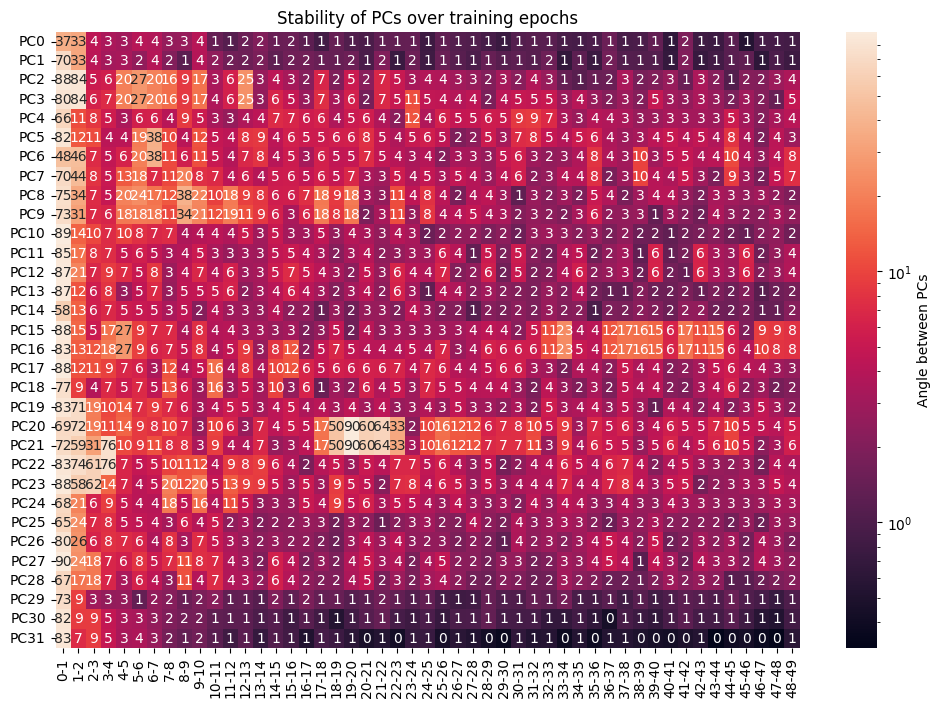

In [13]:
from matplotlib.colors import LogNorm

angle_matrix = np.zeros((len(angle_dict), len(all_epoch_pairs)))

# Fill matrix with angle data
for pc, epoch_data in angle_dict.items():
    i = 0
    for epoch_pair in all_epoch_pairs:
        angle_matrix[pc, i] = epoch_data[epoch_pair]
        i += 1

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    angle_matrix, 
    annot=True, 
    fmt=".0f",
    norm=LogNorm(), 
    xticklabels=[f"{e1}-{e2}" for e1, e2 in all_epoch_pairs], 
    yticklabels=[f"PC{pc}" for pc in angle_dict.keys()],
    cbar_kws={"label": "Angle between PCs"})
ax.set_title("Stability of PCs over training epochs")
plt.show()